The Notebook covers the concept of Stocastic Gradient Descent.

In [5]:
import fastai.basics as bs
import torch

In [6]:
%matplotlib inline

In [7]:
n= 100

In [8]:
x = torch.ones(n,2)

In [11]:
x[:,0].uniform_(-1,1)

tensor([ 0.4702, -0.1019, -0.3908,  0.7811,  0.3410, -0.8481, -0.2951, -0.5599,
         0.9900,  0.8176, -0.6479,  0.0833,  0.2326,  0.0234, -0.9626, -0.3805,
         0.9695,  0.3139, -0.4986, -0.0022,  0.5263,  0.2503, -0.7713,  0.2090,
        -0.3853,  0.7460,  0.6866, -0.8631,  0.6574, -0.6644, -0.2564, -0.2985,
        -0.8609, -0.7933,  0.0768, -0.7516, -0.5673,  0.5259, -0.5744, -0.0936,
        -0.5892, -0.8180,  0.0774,  0.7683,  0.2441, -0.6223, -0.5335,  0.9143,
        -0.3563, -0.5964, -0.3555, -0.0584,  0.5228, -0.2667,  0.3749, -0.7433,
        -0.7632, -0.9017,  0.9756, -0.6672, -0.9784, -0.6894,  0.3593, -0.7933,
        -0.6814, -0.8880, -0.9634,  0.1828,  0.7858, -0.9691,  0.7256, -0.6859,
         0.2345, -0.6157,  0.7636, -0.4428, -0.7236,  0.0235,  0.2109,  0.8765,
        -0.6273,  0.0030, -0.8566,  0.6201, -0.9575, -0.7616, -0.8674,  0.1388,
         0.9196,  0.5017, -0.0837,  0.8654, -0.2944, -0.8695, -0.8543, -0.8018,
        -0.0578,  0.7362,  0.3162,  0.25

In [17]:
a = bs.tensor(3.,2)

In [18]:
a

tensor([3., 2.])

In [19]:
y= x@a + bs.torch.rand(n)

In [20]:
y

tensor([ 3.8985,  2.1673,  1.7632,  5.1736,  3.5733,  0.3097,  1.3955,  0.3381,
         5.3005,  5.1749,  0.4328,  3.1068,  2.8491,  2.1294, -0.2926,  1.7738,
         5.2076,  3.4619,  1.2910,  2.9123,  3.8561,  2.8572, -0.1867,  3.3267,
         1.4262,  4.2723,  4.7681, -0.4089,  4.7565,  0.4984,  1.6623,  1.5237,
        -0.4139,  0.3497,  3.1144,  0.5887,  0.7517,  3.6402,  1.0948,  2.4361,
         0.2403, -0.0431,  3.1314,  5.1075,  2.7541,  0.3512,  1.1951,  4.8213,
         1.7624,  0.4931,  1.6282,  2.6672,  4.2692,  1.3930,  3.5639,  0.6443,
         0.6958, -0.5547,  5.8869,  0.4561, -0.8028,  0.4032,  3.1781,  0.3560,
         0.0981,  0.0892, -0.5061,  3.4582,  4.5087, -0.6708,  4.8718,  0.7039,
         3.4086,  0.7783,  4.9276,  0.7840,  0.2455,  2.2081,  3.1094,  4.8780,
         0.2595,  2.3169, -0.1797,  3.8722,  0.0791,  0.5651, -0.1765,  2.7455,
         4.9625,  3.8497,  1.9254,  5.1848,  1.3962, -0.3626, -0.2043, -0.2802,
         2.6233,  4.2613,  3.6582,  3.33

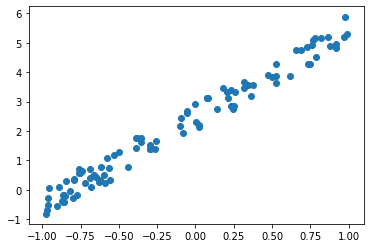

In [22]:
bs.plt.scatter(x[:,0],y)

In [25]:
# define mean square error
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

In [33]:
a=bs.tensor(-3.,3)

In [34]:
y_hat = x@a
mse(y_hat,y)

tensor(15.2252)

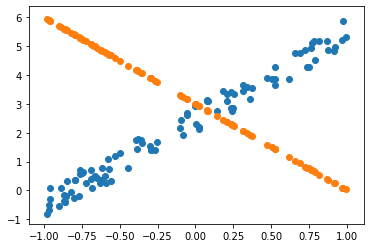

In [35]:
bs.plt.scatter(x[:,0],y)
bs.plt.scatter(x[:,0],y_hat);

In [36]:
val = bs.nn.Parameter(a)

In [37]:
val

Parameter containing:
tensor([-3.,  3.], requires_grad=True)

In [41]:
def weight_update(learning_rate):
    y_hat= x@val
    err = mse(y_hat,y)
    if t%5 == 0:
        print("The loss is on {} iteration is {}".format(t,err))
    err.backward()
    with bs.torch.no_grad():
        val.sub_(learning_rate*val.grad)
        val.grad.zero_()
        
        
    

In [42]:
learning_rate = 1e-1
for t in range(100): weight_update(learning_rate)

The loss is on 0 iteration is 15.225171089172363
The loss is on 5 iteration is 5.055952072143555
The loss is on 10 iteration is 2.3536863327026367
The loss is on 15 iteration is 1.1428881883621216
The loss is on 20 iteration is 0.5808097720146179
The loss is on 25 iteration is 0.31782928109169006
The loss is on 30 iteration is 0.194580540060997
The loss is on 35 iteration is 0.13679784536361694
The loss is on 40 iteration is 0.10970541834831238
The loss is on 45 iteration is 0.09700241684913635
The loss is on 50 iteration is 0.09104631096124649
The loss is on 55 iteration is 0.08825366199016571
The loss is on 60 iteration is 0.08694424480199814
The loss is on 65 iteration is 0.08633027970790863
The loss is on 70 iteration is 0.08604242652654648
The loss is on 75 iteration is 0.0859074518084526
The loss is on 80 iteration is 0.08584416657686234
The loss is on 85 iteration is 0.08581449836492538
The loss is on 90 iteration is 0.08580060303211212
The loss is on 95 iteration is 0.085794046

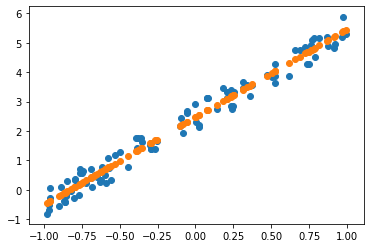

In [44]:
bs.plt.scatter(x[:,0],y)
bs.plt.scatter(x[:,0],x@a);

In [45]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [46]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [57]:
a = bs.nn.Parameter(bs.tensor(-1.,1))

fig = bs.plt.figure()
bs.plt.scatter(x[:,0], y, c='orange')
line, = bs.plt.plot(x[:,0], x@a)
bs.plt.close()

def animate(i):
    weight_update(10*learning_rate)
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, bs.np.arange(0, 100), interval=20)